This notebook prepares FBA dataset for Segmentation Model

In [2]:
%load_ext autoreload
%autoreload 2 

import matplotlib.pyplot as plt
import os
import sys
from PIL import Image

# print(os.getcwd())

from src.colormap_to_coco_annotation_generator import Colormap_to_COCO_Annotation_Generator
from src.dataset_preprocessor import DatasetPreprocessor

from src.image_preprocessor_utils import ImageUtils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Moves images that have matching masks to a separate folder
- skip this step if your every image in your dataset have a corresponding mask

In [6]:
fba_images_dir = "../Data/FBA_dataset/Images/"
fba_masks_dir = "../Data/FBA_dataset/Masks/"

# Images in fba_dataset may contain images without masks. This function moves images with masks to a new directory
DatasetPreprocessor.move_images_with_masks("../Data/fba_dataset/Images", "../Data/fba_dataset/Masks", fba_images_dir, fba_masks_dir)

Out of 166 images, 108 have masks.
These images and masks have been saved to ../Data/FBA_dataset/Images/ and ../Data/FBA_dataset/Masks/


Apply Image Enhancing
- Increase contrast using CLAHE 

In [ ]:
# og_image_dir =  "../Data/FBA_dataset/Images"
# enhanced_images_dir = "../Data/FBA_dataset/enhanced"
# ImageUtils.apply_clahe(og_image_dir, enhanced_images_dir)

108 images are enhanced with CLAHE and saved to ../Data/FBA_dataset/enhanced.


Resize all images and masks

In [ ]:
# DatasetPreprocessor.resize_all_images(enhanced_images_dir, "../Data/FBA_dataset/Images_resized", (1024, 1024))
# DatasetPreprocessor.resize_all_images(fba_masks_dir, "../Data/FBA_dataset/Masks_resized", (1024, 1024))

Resized 108 images to (1024, 1024) and saved to ../Data/FBA_dataset/Images_resized
Resized 108 images to (1024, 1024) and saved to ../Data/FBA_dataset/Masks_resized


Split dataset to train, validation and test

In [28]:
splitted_output_folder = "../Data/FBA_dataset/"
DatasetPreprocessor.split_dataset(image_folder="../Data/FBA_dataset/Images", mask_folder="../Data/FBA_dataset/Masks", output_folder=splitted_output_folder, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1)

Dataset split completed: 86 train, 10 val, 12 test.


Generate COCO annotations if the dataset contains colormaps as labels
- Saves the COCO annotation file in the image dir.
- For generating annotation for train, val and test datasets run cell below for each of them. Also do not forget to adjust image_labeler coco_annotations path in config file (to give the paths of labels for the datasets)

In [2]:
coco_annotation_generator = Colormap_to_COCO_Annotation_Generator(config_path="./preprocessor_config.yaml", labels_out_file_name="train_labels") #add the labels out file name without extensions
coco_annotation_generator.generate_and_save_coco_annotations()

Annotations are generated.
{'id': 1, 'name': 'tool'}
{'id': 2, 'name': 'flank_wear'}
{'id': 3, 'name': 'bue'}
{'id': 4, 'name': 'groove'}
Annotations saved to ../Data/FBA_dataset/train/images/train_labels.json


--------------------------------------------------------------------------------------------

Combine two annotation files

In [1]:
%load_ext autoreload
%autoreload 2 
from src.colormap_to_coco_annotation_generator import Colormap_to_COCO_Annotation_Generator

annfile1_path = "../Data/FBA_dataset/train/images/train_labels.json"
annfile2_path = "../Data/FBA_dataset/generated/second_try/gen10bue_10mix/resized_bmp/labels_10bue_10mix.json"

Colormap_to_COCO_Annotation_Generator.combine_two_coco_annotation_files(annfile1_path, annfile2_path)

CommonMethods cwd:  /home/bsuetcueoglu/MastersThesis/sdfvtcm
Merged annotations saved as merged_annotations.json


--------------------------------------------------------------------------------------------

Generate image labels for Stable Diffusion

For generating labels for train, val and test datasets run below cell for each of them.

In [ ]:
%load_ext autoreload
%autoreload 2 
from src.image_labeler_from_coco import ImageLabeler
import os

print("Notebook cwd:", os.getcwd())

config_file_path = "./preprocessor_config.yaml"
image_labeler = ImageLabeler(config_file_path)
image_labeler.generate_image_prompts()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Notebook cwd: /home/bsuetcueoglu/MastersThesis/sdfvtcm/DatasetPreprocessor
Labels of 12 images, written to ../Data/FBA_dataset/test/images/metadata.jsonl


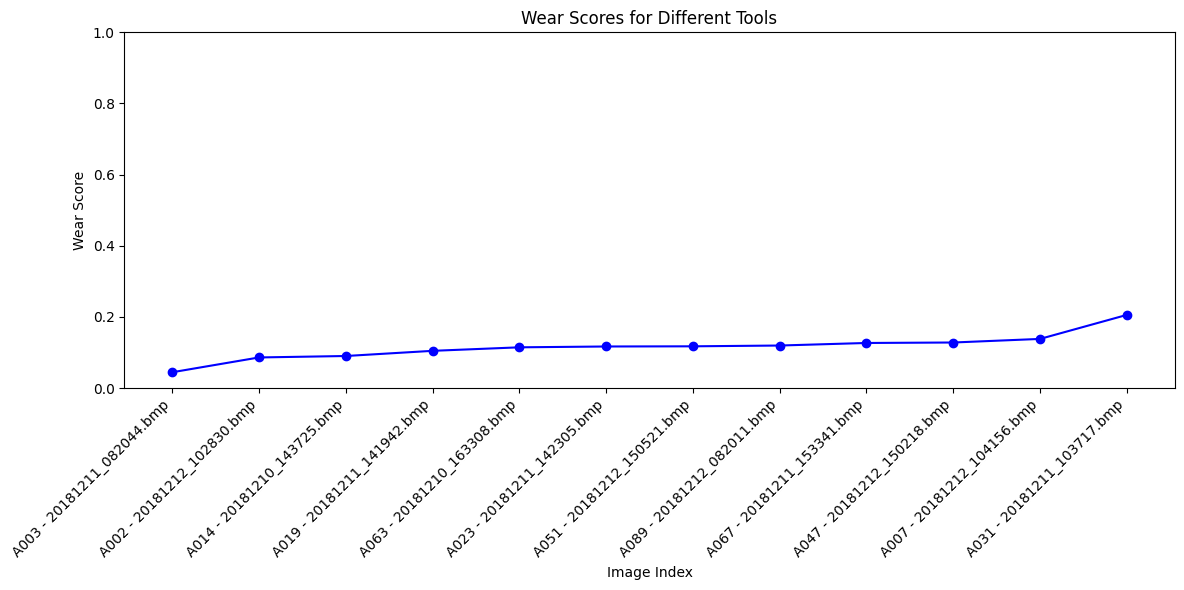

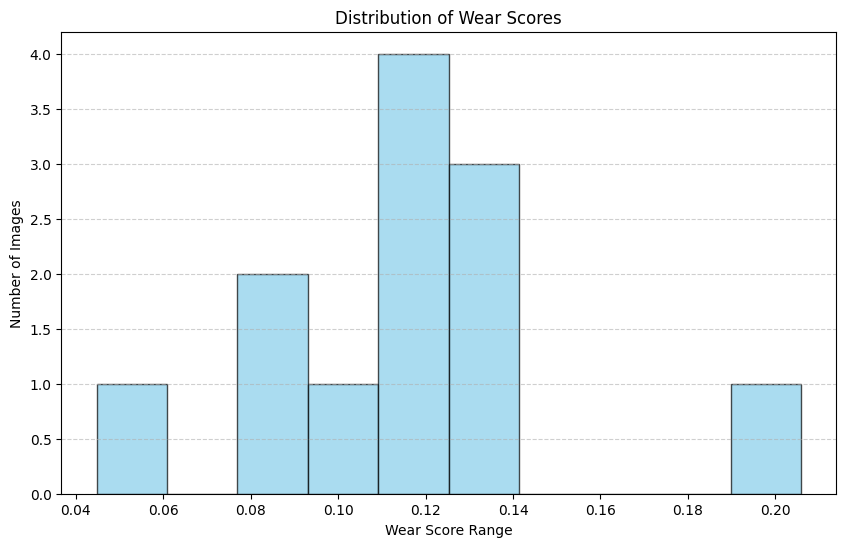

In [ ]:
image_labeler.plot_wear_scores()
image_labeler.plot_wear_score_distribution()